# Explanation
[Here's a link to the article that this data is from.](https://arxiv.org/pdf/1911.09179.pdf) The Midterm 2018 dataset seemed to be a good one, so this notebook looks at it.

# Imports

In [35]:
# for loading files
import json
import csv

# for handling data
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# Loading Data

In [2]:
# load account attributes data
with open('./data/midterm-2018_processed_user_objects.json', 'rt') as file:
    json_data = json.load(file)

In [3]:
# explore basic structure of account attributes data
print('json_data is a list with', len(json_data), 'entries')
print()
print('each entry is a dict with keys:')
print()
for key in json_data[0].keys(): print(key)

json_data is a list with 50538 entries

each entry is a dict with keys:

probe_timestamp
user_id
screen_name
name
description
user_created_at
url
lang
protected
verified
geo_enabled
profile_use_background_image
default_profile
followers_count
friends_count
listed_count
favourites_count
statuses_count
tid


In [4]:
# load human-bot tags
with open('./data/midterm-2018.tsv', 'rt') as file:
    reader = csv.reader(file, delimiter = '\t')
    account_categories = {int(i) : j for i,j in reader}

# make sure there is a one-to-one correspondence between accounts and human-bot tags
assert set(account_categories.keys()) == set([account['user_id'] for account in json_data])

# Processing Data

In [36]:
# merge the human-bot tags with the rest of the data

json_data_modified = json_data.copy()

for account in json_data_modified:
    user_id = account['user_id']
    assert account_categories[user_id] in {'human', 'bot'}
    if account_categories[user_id] == 'human':
        account['human'] = True
    elif account_categories[user_id] == 'bot':
        account['human'] = False

# create a dataframe

uid_list = [account['user_id'] for account in json_data_modified]
df_data = pd.DataFrame(json_data_modified, index = uid_list).drop('user_id', axis = 1)
df_data

,probe_timestamp,screen_name,name,description,user_created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,human
4107317134,Tue Nov 06 20:35:08 2018,danitheduck21,Dani🏳️‍🌈,Dani 💜 She/Her 💜 Randomness all over. Expect l...,Tue Nov 03 21:16:13 2015,None,en,False,False,False,False,False,481,870,26,6542,67025,1059907055421509632,True
4858296837,Tue Nov 06 17:57:51 2018,ncaraballoPR,Natalie Caraballo,"Things I don’t get tired of: Politics, Amy Win...",Thu Jan 28 20:03:51 2016,None,en,False,False,False,False,False,202,712,5,1515,158,1059867472810180609,True
232631847,Tue Nov 06 20:35:23 2018,drmendezmd,Wilson,"Latin american100%! Let fight for our country,...",Fri Dec 31 18:55:05 2010,None,en,False,False,True,True,True,278,342,4,4780,4029,1059907117094711296,True
16700555,Tue Nov 06 19:23:19 2018,ScottNevins,Scott Nevins,TV Personality & Host | Political/News Contrib...,Sat Oct 11 21:39:34 2008,http://www.ScottNevins.com,en,False,True,False,True,False,29546,384,402,143163,53427,1059888980957650944,True
334443152,Tue Nov 06 20:35:24 2018,lild1206,D,None,Wed Jul 13 03:13:52 2011,None,en,False,False,True,True,True,95,668,1,1178,1315,1059907122408898562,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1078921538739544064,Sat Dec 29 07:59:42 2018,Wilfredsteve1,Wilfredsteve,I'm a Widow..God bless America!\nWe rise by he...,Sat Dec 29 07:51:55 2018,None,en,False,False,False,True,True,0,4,0,3,5,1078923499413098496,False
1078923723019874304,Sat Dec 29 08:54:38 2018,VinceGi92042414,Vince Gill,Download Vince’s New Album -umgn.us/d2mlbh,Sat Dec 29 08:00:35 2018,http://VinceGill.com,en,False,False,False,True,True,0,0,0,0,280,1078937323868434432,False
1078937076878503936,Sat Dec 29 09:02:18 2018,KenFish39349255,Ken Fisher,"Self-Made Muilt-Billionaire, Global investor, ...",Sat Dec 29 08:53:39 2018,http://ken-fisher-investments.com,en,False,False,False,True,True,0,0,0,0,1,1078939252958875648,False
1078963374015291392,Sat Dec 29 10:48:30 2018,aniston_a,Stella.A.Aniston,lady aniston's twitter.\ncryptosystem investor...,Sat Dec 29 10:38:09 2018,None,en,False,False,False,True,True,1,9,0,2,4,1078965978162216961,False


In [34]:
# Explore the data's structure!

print('entries of the user_created_at series have type', type(df_data['user_created_at'].iloc[0]))

print('protected contains only False and None entries (I think this tells us whether the account\'s tweets are protected')')
display(df_data['protected'].value_counts(dropna = False))

print('lang')
display(df_data['lang'].value_counts(dropna = False))

# I'm not done here

protected


False    46995
NaN       3543
Name: protected, dtype: int64

lang


en       48006
ru         623
es         552
th         291
vi         272
fr         248
tr         153
pt          81
ar          66
uk          48
de          26
he          25
zh-tw       20
ko          19
id          17
ja          16
hr          13
ro           7
nl           7
it           7
fa           7
en-gb        6
zh-CN        6
sr           5
zh-cn        4
sv           2
fi           2
xx-lc        2
en-GB        2
en-AU        1
lv           1
zh-TW        1
hu           1
bg           1
Name: lang, dtype: int64

user_created_at has type <class 'str'>


We will need to one-hot encode the language data. Probably en, ru, es, and "other" will be enough. We should also collapse the "url" attribute into a boolean "has url". Most of the columns seem to be boolean, and all these will probably need to be one-hot encoded. We should also think about encoding data like "does the account name have an emoji?"

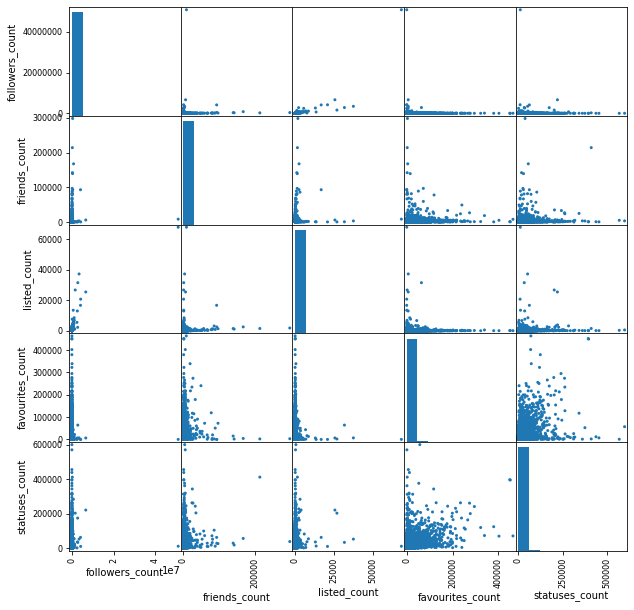

In [33]:
# This code block is kind of pointless but I want to make something like this after the data is formatted
# Here's a stackoverflow answer showing what I want: https://stackoverflow.com/a/22976730/12633743
pd.plotting.scatter_matrix(df_data[['followers_count','friends_count','listed_count','favourites_count','statuses_count']], figsize = (10,10), alpha = 1)
plt.show()